In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [3]:
# get an idea of the data

rr_2016.head()
tt_2016.head()
rr_2019.head()
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


In [4]:
# rows, columns

print(rr_2016.shape)
print(tt_2016.shape)
print(rr_2019.shape)
print(tt_2019.shape)

(2822, 11)
(1541, 11)
(5503, 11)
(2655, 11)


### Q1) What is the overall distance travelled for each of the rides? What are the average speeds etc. Provide a summary for each ride.

In [5]:
dist_rr16 = rr_2016["distance"].sum(axis = 0, skipna = True)
speed_rr16 = rr_2016["speed"].mean()
print("Distance RR-16: ", "{:.2f}".format(dist_rr16), "KM")
print("Average Speed RR-16: ", "{:.2f}".format(speed_rr16), "KM/H \n")

dist_tt16 = tt_2016["distance"].sum(axis = 0, skipna = True)
speed_tt16 = tt_2016["speed"].mean()
print("Distance TT-16: ", "{:.2f}".format(dist_tt16), "KM")
print("Average Speed RR-16: ", "{:.2f}".format(speed_tt16), "KM/H \n")

dist_rr19 = rr_2019["distance"].sum(axis = 0, skipna = True)
speed_rr19 = rr_2019["speed"].mean()
print("Distance RR-19: ", "{:.2f}".format(dist_rr19), "KM")
print("Average Speed RR-19: ", "{:.2f}".format(speed_rr19), "KM/H \n")

dist_tt19 = tt_2019["distance"].sum(axis = 0, skipna = True)
speed_tt19 = tt_2019["speed"].mean()
print("Distance TT-19: ", "{:.2f}".format(dist_tt19), "KM")
print("Average Speed TT-19: ", "{:.2f}".format(speed_tt19), "KM/H")

Distance RR-16:  49.05 KM
Average Speed RR-16:  34.93 KM/H 

Distance TT-16:  24.80 KM
Average Speed RR-16:  33.53 KM/H 

Distance RR-19:  51.79 KM
Average Speed RR-19:  33.88 KM/H 

Distance TT-19:  24.38 KM
Average Speed TT-19:  33.06 KM/H


#### Analysis

We can see that the distance travelled in the Road Race in 2016 was slightly lesser (49.05 KM) as compared to Road Race of 2019 (51.79 KM). In both Time Trials distance travelled was roughly the the same (24.80 KM in 2016 and 24.38 KM in 2019). While ideally the road race distance should be exactly double the time trial distance, we see that it is almost the case. The little variation can be chalked off to inaccurate GPS data causing the distance to be larger.

The average speed in both Road Races were higher than their corresponding Time Trials.

###  Q2) Compare the range of speeds for each ride, are time trials faster than road races?

In [6]:
speed_max_rr16 = rr_2016["speed"].max()
speed_max_tt16 = tt_2016["speed"].max()
speed_max_rr19 = rr_2019["speed"].max()
speed_max_tt19 = tt_2019["speed"].max()

print("Max speed in road race 2016 is ", "{:.2f}".format(speed_max_rr16), "KM/H") 
print("Max speed in time trial 2016 is ", "{:.2f}".format(speed_max_tt16), "KM/H")
print("Max speed in road race 2019 is ", "{:.2f}".format(speed_max_rr19), "KM/H")
print("Max speed in time trial 2019 is ", "{:.2f}".format(speed_max_tt19), "KM/H \n")

Max speed in road race 2016 is  92.75 KM/H
Max speed in time trial 2016 is  162.51 KM/H
Max speed in road race 2019 is  70.37 KM/H
Max speed in time trial 2019 is  63.30 KM/H 



In [7]:
speed_rr = (rr_2016["speed"].mean() + rr_2019["speed"].mean())/2
speed_tt = (tt_2016["speed"].mean() + tt_2019["speed"].mean())/2

data = [["Road Races", speed_rr] , ["Time Trials",speed_tt]]
speed_comp = pd.DataFrame(data, columns = ['Race', 'Avg Speed'])

print("The Average Speed difference between Road Race and Time Trial is: ",
      "{:.2f}".format((speed_comp['Avg Speed'][0] - speed_comp['Avg Speed'][1])), "KM/H")

speed_comp

The Average Speed difference between Road Race and Time Trial is:  1.11 KM/H


,Race,Avg Speed
0,Road Races,34.406473
1,Time Trials,33.293893


#### Analysis

Our findings suggests that Road Races (34.41 KM/H) are slightly faster on average than time trials (33.29 KM/H)

The difference in Average Speed between Road Race and Time Trial is 1.11 KM/H. Here we see that the average Speed in both road races were higher than that of the time trials. Looking at max speeds we also see that a higher top speed was achieved in both road races as compared to time trials (considering the 162.51 KM/H is an outlier).

### Outliers

We can see from the max and min values that there are some outliers in speed in 2016 time trial as the [highest recorded speed recorded in regular conditions](https://en.wikipedia.org/wiki/Bicycle_performance#Typical_speeds) is 100 KMPH. However speeds of 160 KMPH is possible when cycling on an incline, it is unlikely that the speed is achieved only in 2016 and not even getting close to it in 2019.  These outliers need to be fixed.

In [8]:
sorted_rr_2016 = rr_2016.sort_values(["speed"], ascending=False)
print(sorted_rr_2016['speed'].head(), "\n")
sorted_tt_2016 = tt_2016.sort_values(["speed"], ascending=False)
print(sorted_tt_2016['speed'].head(), "\n")
sorted_rr_2019 = rr_2019.sort_values(["speed"], ascending=False)
print(sorted_rr_2019['speed'].head(), "\n")
sorted_tt_2019 = tt_2019.sort_values(["speed"], ascending=False)
print(sorted_tt_2019['speed'].head(), "\n")

2016-05-14 04:41:10+00:00    92.749036
2016-05-14 04:18:21+00:00    89.394487
2016-05-14 04:08:40+00:00    70.709487
2016-05-14 04:51:51+00:00    69.530751
2016-05-14 04:51:53+00:00    68.389981
Name: speed, dtype: float64 

2016-07-02 23:31:56+00:00    162.505764
2016-07-02 23:12:00+00:00     67.862011
2016-07-02 23:12:02+00:00     67.105804
2016-07-02 23:12:01+00:00     65.840624
2016-07-02 23:42:48+00:00     64.670085
Name: speed, dtype: float64 

2019-06-22 22:42:31+00:00    70.370469
2019-06-22 22:42:33+00:00    69.729681
2019-06-22 22:42:32+00:00    69.729678
2019-06-22 22:42:29+00:00    68.832793
2019-06-22 22:42:27+00:00    68.360023
Name: speed, dtype: float64 

2019-06-01 23:01:02+00:00    63.300734
2019-06-01 23:01:01+00:00    63.144368
2019-06-01 23:31:09+00:00    62.890910
2019-06-01 23:00:58+00:00    62.549094
2019-06-01 23:00:57+00:00    62.288522
Name: speed, dtype: float64 



<AxesSubplot:xlabel='speed'>

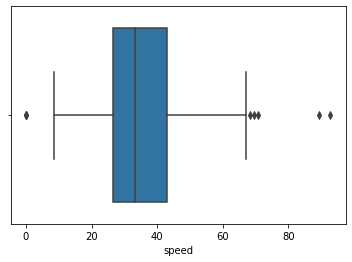

In [9]:
sns.boxplot(x=rr_2016['speed'])

<AxesSubplot:xlabel='speed'>

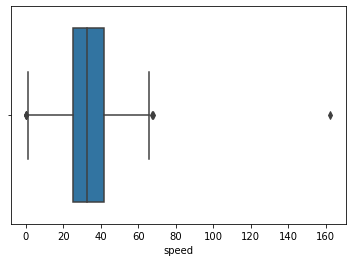

In [10]:
sns.boxplot(x=tt_2016['speed'])

Looking at above data we see that in 2016 both races had issues with the speed being higher than it probably was. The boxplot cofirms this with a few points very far away from the rest. This could be due to the GPS signal being lost and the use of older technology as compared to 2019. For a more accurate analysis we are going to replace those values with the next highest and more reasonable value.

RR2016 -> 92.749036 & 89.394487 are outliers. We are going to set both these values to the next reasonable highest that is 70.709487.

TT2016 -> 162.505764 is an outlier. We are going to set this values to the next reasonable highest that is 67.862011.


2019 data was considered when selecting a more accurate highest value.

#### Removing Outliers

In [11]:
rr_2016_cleaned = rr_2016.replace([92.74903649913952, 89.39448670463406], 70.70948664334745)
tt_2016_cleaned = tt_2016.replace([162.50576377606754], 67.86201094032148)

In [12]:
rr_2016_cleaned.speed.max()

70.70948664334745

In [13]:
tt_2016_cleaned.speed.max()

67.86201094032148

### Checking the Average speed data after removing outliers.

In [14]:
dist_rr16 = rr_2016_cleaned["distance"].sum(axis = 0, skipna = True)
speed_rr16 = rr_2016_cleaned["speed"].mean()
print("Distance RR-16: ", "{:.2f}".format(dist_rr16), "KM")
print("Average Speed RR-16: ", "{:.2f}".format(speed_rr16), "KM/H \n")

dist_tt16 = tt_2016_cleaned["distance"].sum(axis = 0, skipna = True)
speed_tt16 = tt_2016_cleaned["speed"].mean()
print("Distance TT-16: ", "{:.2f}".format(dist_tt16), "KM")
print("Average Speed TT-16: ", "{:.2f}".format(speed_tt16), "KM/H \n")

dist_rr19 = rr_2019["distance"].sum(axis = 0, skipna = True)
speed_rr19 = rr_2019["speed"].mean()
print("Distance RR-19: ", "{:.2f}".format(dist_rr19), "KM")
print("Average Speed RR-19: ", "{:.2f}".format(speed_rr19), "KM/H \n")

dist_tt19 = tt_2019["distance"].sum(axis = 0, skipna = True)
speed_tt19 = tt_2019["speed"].mean()
print("Distance TT-19: ", "{:.2f}".format(dist_tt19), "KM")
print("Average Speed TT-19: ", "{:.2f}".format(speed_tt19), "KM/H \n")

speed_max_rr16 = rr_2016_cleaned["speed"].max()
speed_max_tt16 = tt_2016_cleaned["speed"].max()
speed_max_rr19 = rr_2019["speed"].max()
speed_max_tt19 = tt_2019["speed"].max()

print("Max speed in RR16", "{:.2f}".format(speed_max_rr16), "KM/H") 
print("Max speed in TT16", "{:.2f}".format(speed_max_tt16), "KM/H")
print("Max speed in RR19", "{:.2f}".format(speed_max_rr19), "KM/H")
print("Max speed in TT19", "{:.2f}".format(speed_max_tt19), "KM/H \n")

speed_rr = (rr_2016_cleaned["speed"].mean() + rr_2019["speed"].mean())/2
speed_tt = (tt_2016_cleaned["speed"].mean() + tt_2019["speed"].mean())/2

data = [["Road Races", speed_rr] , ["Time Trials",speed_tt]]
speed_comp = pd.DataFrame(data, columns = ['Race', 'Avg Speed'])



print("The Average Speed difference between Road Race and Time Trial is: ",
      "{:.2f}".format((speed_comp['Avg Speed'][0] - speed_comp['Avg Speed'][1])), "KM/H")

speed_comp

Distance RR-16:  49.05 KM
Average Speed RR-16:  34.92 KM/H 

Distance TT-16:  24.80 KM
Average Speed TT-16:  33.47 KM/H 

Distance RR-19:  51.79 KM
Average Speed RR-19:  33.88 KM/H 

Distance TT-19:  24.38 KM
Average Speed TT-19:  33.06 KM/H 

Max speed in RR16 70.71 KM/H
Max speed in TT16 67.86 KM/H
Max speed in RR19 70.37 KM/H
Max speed in TT19 63.30 KM/H 

The Average Speed difference between Road Race and Time Trial is:  1.14 KM/H


,Race,Avg Speed
0,Road Races,34.399258
1,Time Trials,33.263185


#### Analysis

As expected we see the average speed in both 2016 races reduce by a small amount. Road race average speed reduced from 34.93 KM/H to 34.92 KM/H and Time Trial reduced from 33.53 KM/H to 33.47 KM/H.

The difference in average Speed between Road Race and Time Trial increased from 1.11 KM/H to 1.14 KM/H. Road Races are faster than Time Trials.

### Q3 Compare the speeds achieved in the two time trials (three years apart). As well as looking at the averages, can you see where in the ride one or the other is faster.

To Graphically compare the 2 time trial races, we can create another column for the cumulative distance travelled as both races were on the same course. We can then plot the time trial speeds with the cumulative distance which should give us an idea where in ride or the other, the rider is faster.

In [15]:
#Adding a column for Total distance travelled upto each observation.

rr_2016_cleaned['TotalDistance'] = rr_2016_cleaned["distance"].cumsum()
tt_2016_cleaned['TotalDistance'] = tt_2016_cleaned["distance"].cumsum()
rr_2019['TotalDistance'] = rr_2019["distance"].cumsum()
tt_2019['TotalDistance'] = tt_2019["distance"].cumsum()

In [16]:
tt_2016_cleaned.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,TotalDistance
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN,0.000000
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0,0.006161
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0,0.007813
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0,0.009408
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0,0.011003


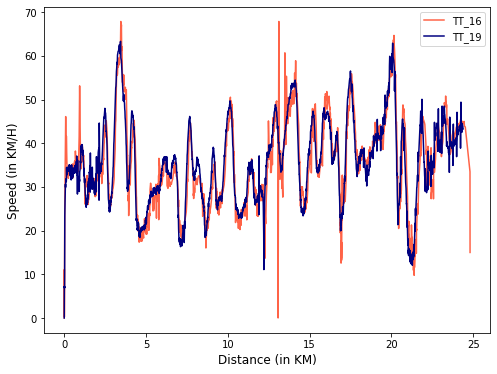

In [17]:
plt.figure(figsize=(8,6))
plt.plot(tt_2016_cleaned['TotalDistance'], tt_2016_cleaned['speed'], label = 'TT_16', c = 'tomato')
plt.plot(tt_2019['TotalDistance'], tt_2019['speed'], label = 'TT_19', c = 'navy')
plt.xlabel("Distance (in KM)", size=12)
plt.ylabel("Speed (in KM/H)", size=12)
plt.legend(loc='upper right')
plt.show()

In [18]:
#finding average speed for range of distance travelled

range1_16 = tt_2016_cleaned.loc[(tt_2016_cleaned['TotalDistance'] < 5), 'speed'].mean()
range2_16 = tt_2016_cleaned.loc[(tt_2016_cleaned['TotalDistance'] >= 5)
                                & (tt_2016_cleaned['TotalDistance'] < 10), 'speed'].mean()
range3_16 = tt_2016_cleaned.loc[(tt_2016_cleaned['TotalDistance'] >= 10)
                                & (tt_2016_cleaned['TotalDistance'] < 15), 'speed'].mean()
range4_16 = tt_2016_cleaned.loc[(tt_2016_cleaned['TotalDistance'] >= 15)
                                & (tt_2016_cleaned['TotalDistance'] < 20), 'speed'].mean()
range5_16 = tt_2016_cleaned.loc[(tt_2016_cleaned['TotalDistance'] >= 20)
                                & (tt_2016_cleaned['TotalDistance'] < 25), 'speed'].mean()
range1_19 = tt_2019.loc[(tt_2019['TotalDistance'] < 5), 'speed'].mean()
range2_19 = tt_2019.loc[(tt_2019['TotalDistance'] >= 5) & (tt_2019['TotalDistance'] < 10), 'speed'].mean()
range3_19 = tt_2019.loc[(tt_2019['TotalDistance'] >= 10) & (tt_2019['TotalDistance'] < 15), 'speed'].mean()
range4_19 = tt_2019.loc[(tt_2019['TotalDistance'] >= 15) & (tt_2019['TotalDistance'] < 20), 'speed'].mean()
range5_19 = tt_2019.loc[(tt_2019['TotalDistance'] >= 20) & (tt_2019['TotalDistance'] <= 25), 'speed'].mean()

#converting the data above into a dataframe for better readability

data1 = [["0-5 KM", range1_16, range1_19], ["5-10 KM", range2_16, range2_19] , ["10-15 KM", range3_16, range3_19],
         ["15-20 KM", range4_16, range4_19], ["20-25 KM", range5_16, range5_19]]
timetrials = pd.DataFrame(data1, columns = ['Range', 'TT-16', 'TT-19'])

timetrials

,Range,TT-16,TT-19
0,0-5 KM,32.848524,32.228818
1,5-10 KM,27.845551,29.337669
2,10-15 KM,34.459593,33.373380
3,15-20 KM,40.431889,39.168781
4,20-25 KM,32.064543,32.587197


#### Analysis

We already know the overall average speed in 2016 Time trial was higher than 2019. Also the maximum speed in 2016 was higher as well.

From the graph as well as the table we can compare the range of speeds across intervals of every 5 KM travelled.

For the first 5 km, the rider was slightly faster in 2016 as comapred to 2019. Next 5 KM we see the 2019 ride almost 2 KM/H faster than the 2016 ride. Next 10 KM, the 2016 ride was faster on an average of around 1.1 KM/H. In the final strech the rider was faster in 2019 by 0.5 KM/H.

### Q4) Average Speed during each Elevation Gain

In [19]:
set(tt_2019['elevation_gain'])

{-1.5999999999999943,
 -1.4000000000000057,
 -1.3999999999999773,
 -1.200000000000017,
 -1.1999999999999886,
 -1.0,
 -0.8000000000000114,
 -0.799999999999983,
 -0.7999999999999545,
 -0.6000000000000227,
 -0.5999999999999943,
 -0.5999999999999659,
 -0.4000000000000341,
 -0.4000000000000057,
 -0.39999999999997726,
 -0.20000000000004547,
 -0.20000000000001705,
 -0.19999999999998863,
 0.0,
 0.19999999999998863,
 0.20000000000001705,
 0.20000000000004547,
 0.39999999999997726,
 0.4000000000000057,
 0.4000000000000341,
 0.5999999999999943,
 0.6000000000000227}

Based on the values above we are going to consider any elevation change of less than 0.20 or greater than -0.20 as flat. Positive elevation gain above 0.20 is climbing and negative below -0.20 is descending.

In [20]:
#rr16
flat_rr16 = rr_2016_cleaned.loc[(rr_2016_cleaned['elevation_gain'] > -0.20) & (rr_2016_cleaned['elevation_gain'] < 0.20),
                                'speed'].mean()
climb_rr16 = rr_2016_cleaned.loc[(rr_2016_cleaned['elevation_gain'] >= 0.20), 'speed'].mean()
desc_rr16 = rr_2016_cleaned.loc[(rr_2016_cleaned['elevation_gain'] <= -0.20), 'speed'].mean()

# tt16
flat_tt16 = tt_2016_cleaned.loc[(tt_2016_cleaned['elevation_gain'] > -0.20) & (tt_2016_cleaned['elevation_gain'] < 0.20),
                                'speed'].mean()
climb_tt16 = tt_2016_cleaned.loc[(tt_2016_cleaned['elevation_gain'] >= 0.20), 'speed'].mean()
desc_tt16 = tt_2016_cleaned.loc[(tt_2016_cleaned['elevation_gain'] <= -0.20), 'speed'].mean()

# rr19
flat_rr19 = rr_2019.loc[(rr_2019['elevation_gain'] > -0.20) & (rr_2019['elevation_gain'] < 0.20),
                                'speed'].mean()
climb_rr19 = rr_2019.loc[(rr_2019['elevation_gain'] >= 0.20), 'speed'].mean()
desc_rr19 = rr_2019.loc[(rr_2019['elevation_gain'] <= -0.20), 'speed'].mean()

#tt19
flat_tt19 = tt_2019.loc[(tt_2019['elevation_gain'] > -0.20) & (tt_2019['elevation_gain'] < 0.20),
                                'speed'].mean()
climb_tt19 = tt_2019.loc[(tt_2019['elevation_gain'] >= 0.20), 'speed'].mean()
desc_tt19 = tt_2019.loc[(tt_2019['elevation_gain'] <= -0.20), 'speed'].mean()

In [21]:
data2 = [["Flat", flat_rr16, flat_tt16, flat_rr19, flat_tt19,(flat_rr16+flat_tt16+flat_rr19+flat_tt19)/4],
         ["Climbing", climb_rr16, climb_tt16, climb_rr19, climb_tt19, (climb_rr16+climb_tt16+climb_rr19+climb_tt19)/4],
         ["Descending", desc_rr16, desc_tt16, desc_rr19, desc_tt19, (desc_rr16+desc_tt16+desc_rr19+desc_tt19)/4]]
elevation_avg = pd.DataFrame(data2, columns = ['Elevation Type', 'RR-16', 'TT-16', 'RR-19', 'TT-19', 'Average'])

elevation_avg

,Elevation Type,RR-16,TT-16,RR-19,TT-19,Average
0,Flat,34.379637,34.040275,32.757889,32.128664,33.326616
1,Climbing,26.372199,24.582852,28.323162,25.065537,26.085938
2,Descending,45.910015,44.880480,43.558973,45.067211,44.854170


#### Analysis

We notice that the average speed, across all 4 races, while driving flat is 33.32 KM/H with the highest being in Road Race 2016 at 34.37 KM/H. While climbing our average speed drops to 26.08 KM/H with the highest being in the 2019 Road race at 28.32 KM/H. While descending our Average speed is 44.85 KM/H with the highest average achieved in the 2016 Road Race at 45.91 KM/H.


## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





In [22]:
# Development = Speed(m/min)/Cadence (rev/min)

tt_2019["Development"] = (tt_2019["speed"]*1000/60)/(tt_2019["cadence"])
print(tt_2019["Development"].describe(), "\n", "\n")
print(tt_2019["Development"])

count    2654.000000
mean             inf
std              NaN
min         2.225050
25%         4.827508
50%         5.782496
75%         6.794445
max              inf
Name: Development, dtype: float64 
 

2019-06-01 22:54:55+00:00         NaN
2019-06-01 22:54:56+00:00         inf
2019-06-01 22:54:57+00:00         inf
2019-06-01 22:54:58+00:00         inf
2019-06-01 22:54:59+00:00         inf
                               ...   
2019-06-01 23:39:05+00:00    7.320711
2019-06-01 23:39:06+00:00    7.262362
2019-06-01 23:39:07+00:00    7.254161
2019-06-01 23:39:08+00:00    7.313255
2019-06-01 23:39:09+00:00    9.878877
Name: Development, Length: 2655, dtype: float64


In [23]:
# Replacing the infinite values with NaN
tt_2019.replace([np.inf, -np.inf], np.nan, inplace=True)
print(tt_2019["Development"])

2019-06-01 22:54:55+00:00         NaN
2019-06-01 22:54:56+00:00         NaN
2019-06-01 22:54:57+00:00         NaN
2019-06-01 22:54:58+00:00         NaN
2019-06-01 22:54:59+00:00         NaN
                               ...   
2019-06-01 23:39:05+00:00    7.320711
2019-06-01 23:39:06+00:00    7.262362
2019-06-01 23:39:07+00:00    7.254161
2019-06-01 23:39:08+00:00    7.313255
2019-06-01 23:39:09+00:00    9.878877
Name: Development, Length: 2655, dtype: float64


In [24]:
# Dropping all NaN values
tt_2019_dev = tt_2019.dropna()
tt_2019_dev["Development"].describe()

count    2597.000000
mean        6.628431
std        13.123604
min         2.225050
25%         4.806369
50%         5.765876
75%         6.700827
max       394.113042
Name: Development, dtype: float64

In [25]:
#Removing the outliers that is below 2m and above 10m

tt_2019_dev = tt_2019_dev.drop(tt_2019_dev.index[(tt_2019_dev['Development'] < 2.0) | (tt_2019_dev['Development'] > 10.0)])
tt_2019_dev["Development"].describe()

count    2552.000000
mean        5.777333
std         1.318482
min         2.225050
25%         4.792735
50%         5.751048
75%         6.585764
max         9.878877
Name: Development, dtype: float64

In [26]:
#Running the code for the other 3 Races

rr_2019["Development"] = (rr_2019["speed"]*1000/60)/(rr_2019["cadence"])
rr_2019.replace([np.inf, -np.inf], np.nan, inplace=True)
rr_2019_dev = rr_2019.dropna()
rr_2019_dev = rr_2019_dev.drop(rr_2019_dev.index[(rr_2019_dev['Development'] < 2.0) | (rr_2019_dev['Development'] > 10.0)])

rr_2016_cleaned["Development"] = (rr_2016_cleaned["speed"]*1000/60)/(rr_2016_cleaned["cadence"])
rr_2016_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
rr_2016_cleaned_dev = rr_2016_cleaned.dropna()
rr_2016_cleaned_dev = rr_2016_cleaned_dev.drop(rr_2016_cleaned_dev.index[(rr_2016_cleaned_dev['Development'] < 2.0)
                                                                         | (rr_2016_cleaned_dev['Development'] > 10.0)])

tt_2016_cleaned["Development"] = (tt_2016_cleaned["speed"]*1000/60)/(tt_2016_cleaned["cadence"])
tt_2016_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
tt_2016_cleaned_dev = tt_2016_cleaned.dropna()
tt_2016_cleaned_dev = tt_2016_cleaned_dev.drop(tt_2016_cleaned_dev.index[(tt_2016_cleaned_dev['Development'] < 2.0)
                                                                         | (tt_2016_cleaned_dev['Development'] > 10.0)])

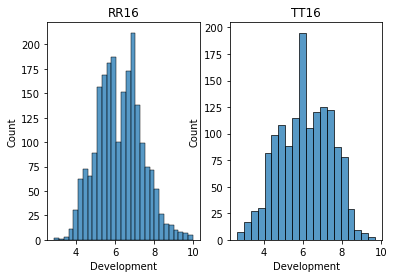

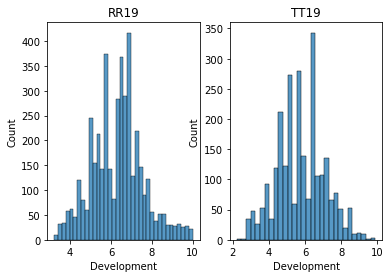

In [27]:
# Plots

fig, ax =plt.subplots(1, 2)
sns.histplot(rr_2016_cleaned_dev, x="Development", ax=ax[0]).set(title='RR16')
sns.histplot(tt_2016_cleaned_dev, x="Development", ax=ax[1]).set(title='TT16')
fig, axi =plt.subplots(1, 2)
sns.histplot(rr_2019_dev, x="Development", ax=axi[0]).set(title='RR19')
sns.histplot(tt_2019_dev, x="Development", ax=axi[1]).set(title='TT19')
plt.show()

#### Analysis

From the graphs we see that in all 4 races the development follows a Normal Distribution. As most of the race is flat, there is no requirement for driver to change gear that often. and the most common development is between 6 and 7.

From [wikipedia](https://en.wikipedia.org/wiki/Bicycle_gearing) page of Bicylcing gearing we see that lower development means lower gear. Since all 4 of our races were mostly flat, the most common gear would be the one giving us a 6-7 m development which would be the lowest effort with maximum distance travelled which we also confirm from the graphs.